In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt

2023-02-13 15:14:13.555601: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 15:14:13.744951: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-13 15:14:13.744977: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-13 15:14:14.890575: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [39]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = tf.keras.utils.to_categorical(y_train)

y_test = tf.keras.utils.to_categorical(y_test)

x_train = x_train.reshape(
    x_train.shape[0], x_train.shape[1], x_train.shape[2], 1
)

x_test = x_test.reshape(
    x_test.shape[0], x_test.shape[1], x_test.shape[2], 1
)


In [31]:

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(
        32, (3, 3), activation="relu", input_shape=(28, 28, 1)
    ),

    # tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation="relu"),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train, y_train, epochs=10)

model.evaluate(x_test, y_test, verbose=2)

Epoch 1/10


2023-02-12 16:35:46.000713: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 121s 63ms/step - loss: 0.2255 - accuracy: 0.9322
Epoch 2/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0925 - accuracy: 0.9729
Epoch 3/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0671 - accuracy: 0.9791
Epoch 4/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0530 - accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0416 - accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 121s 64ms/step - loss: 0.0343 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0283 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 756s 403ms/step - loss: 0.0254 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 123s 65ms/step - loss: 0.0225 - accuracy: 0.9922
Epoch 10/10
1875/1875 [==============================] - 116s 62m

[0.05677317455410957, 0.9847999811172485]

In [35]:
model.save("recognizer")

INFO:tensorflow:Assets written to: recognizer/assets


INFO:tensorflow:Assets written to: recognizer/assets


1/1 [==============================] - 0s 111ms/step


7

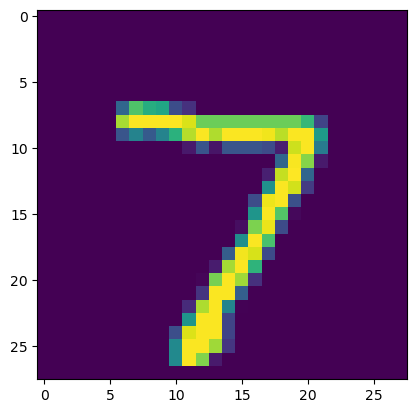

In [66]:
model  = tf.keras.models.load_model("recognizer")

number = 10000 - 1
image = x_test[:1]


plt.imshow(image.reshape(28, 28, 1))
predictions = model.predict(image).reshape(10)

predictions = list(zip(predictions, range(predictions.size)))
sorted(predictions, reverse=True)[0][1]

def predict(image, model):
    predictions = model.predict(image).reshape(10)
    predictions = list(zip(predictions), range(predictions.size))
    return sorted(predictions, reverse=True)[0][1]
    